<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [92]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-12-28 11:59:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.6’

m4_survey_data.sqli 100%[===================>]  34.98M  32.0MB/s    in 1.1s    

2023-12-28 11:59:49 (32.0 MB/s) - ‘m4_survey_data.sqlite.6’ saved [36679680/36679680]



Connect to the database.


In [93]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [94]:
import pandas as pd

## Demo: How to run an sql query


In [32]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [33]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [34]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn).head(10)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [35]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


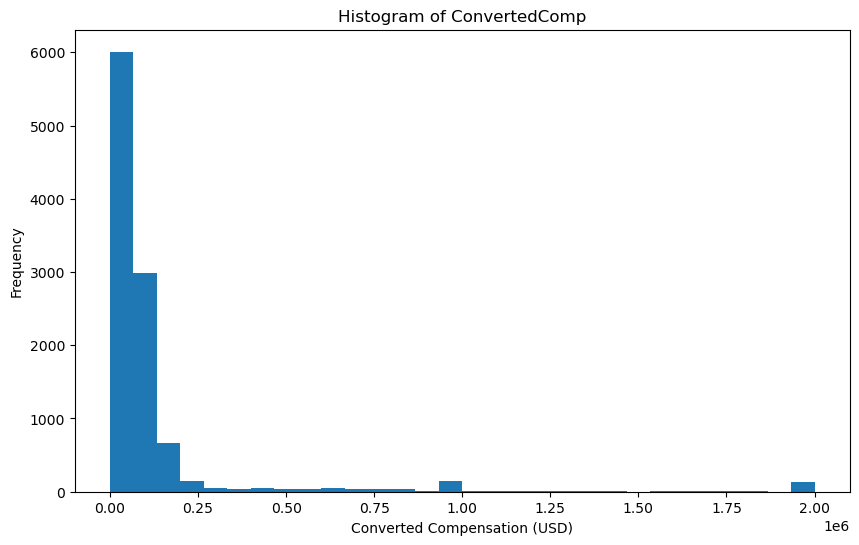

In [36]:
import matplotlib.pyplot as plt

sql_query = "SELECT ConvertedComp FROM master"
df= pd.read_sql_query(sql_query, conn)

df['ConvertedComp'].plot(kind='hist', bins=30, figsize=(10, 6))
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

### Box Plots


Plot a box plot of `Age.`


Text(0.5, 0, 'Age')

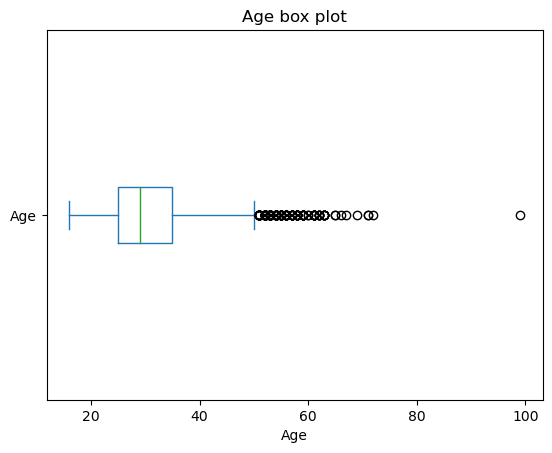

In [37]:
# your code goes here

sql_query = "SELECT Age FROM master"
df=pd.read_sql_query(sql_query, conn)


df["Age"].plot(kind= 'box',vert = False)
plt.title('Age box plot')

plt.xlabel('Age')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


Text(0, 0.5, 'WorkWeekHrs')

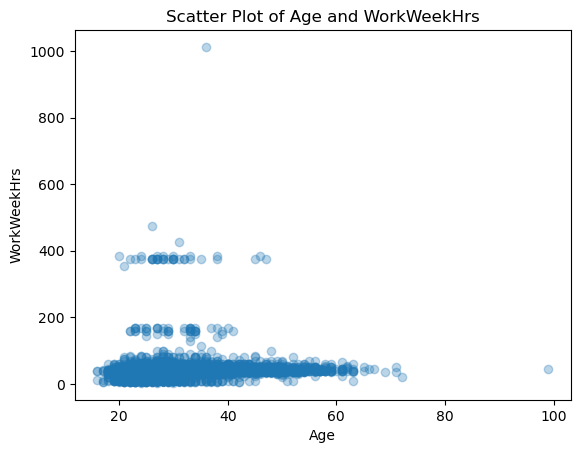

In [38]:
sql_query= "SELECT WorkWeekHrs,Age FROM master"
df= pd.read_sql_query(sql_query,conn)
plt.scatter(df['Age'],df['WorkWeekHrs'], alpha=0.3)
plt.title('Scatter Plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


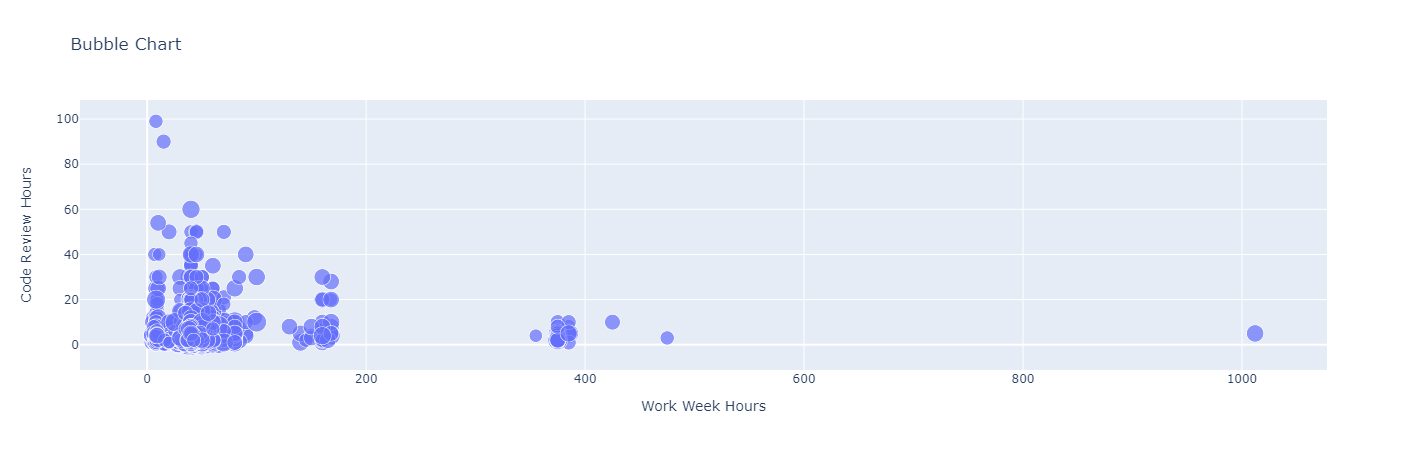

In [43]:
sql_query= "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master"
df=pd.read_sql_query(sql_query, conn)
df = df.dropna(subset=['Age'])

import plotly.express as px

fig = px.scatter(df, x='WorkWeekHrs', y='CodeRevHrs', size='Age', title='Bubble Chart',
                 labels={'WorkWeekHrs': 'Work Week Hours', 'CodeRevHrs': 'Code Review Hours'})

fig.show()







## Visualizing composition of data


### Pie Charts


### Stacked Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [108]:
sql_query ="SELECT name FROM sqlite_master WHERE type='table'"
tables = conn.execute(sql_query).fetchall()

# Print the list of tables
print("Available Tables:")
for table in tables:
    print(table[0])


Available Tables:
EduOther
DevType
LastInt
JobFactors
WorkPlan
WorkChallenge
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
DatabaseDesireNextYear
PlatformWorkedWith
PlatformDesireNextYear
WebFrameWorkedWith
WebFrameDesireNextYear
MiscTechWorkedWith
MiscTechDesireNextYear
DevEnviron
Containers
SOVisitTo
SONewContent
Gender
Sexuality
Ethnicity
master


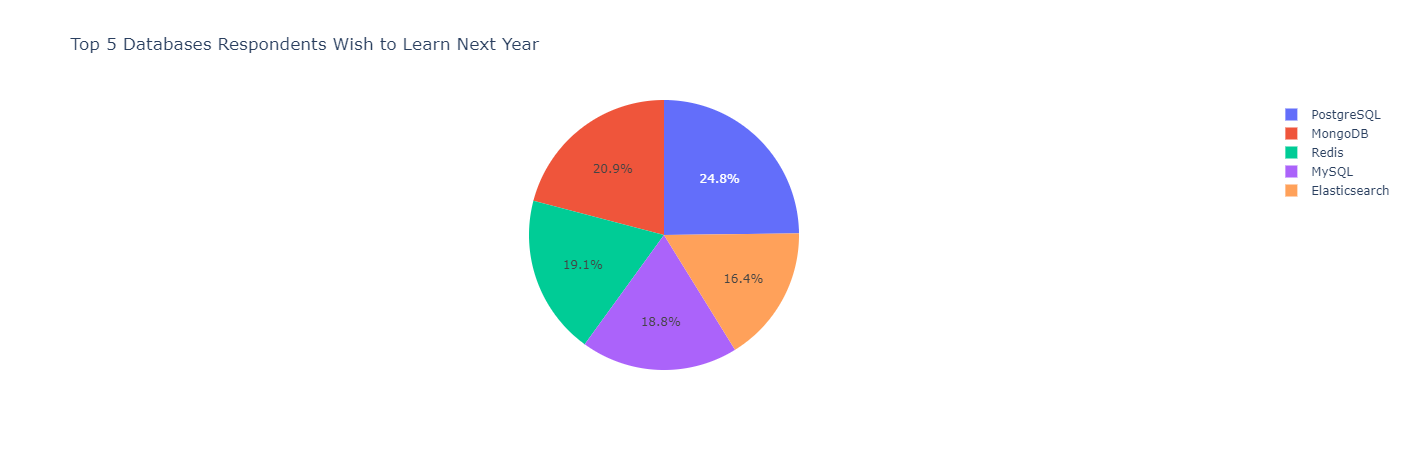

In [81]:
# your code goes here
sql_query = "SELECT DatabaseDesireNextYear FROM DatabaseDesireNextYear"
df=pd.read_sql_query(sql_query,conn)
top_dbs= df.value_counts().nlargest(5).reset_index()
top_dbs.columns = ['Database', 'Count']
px.pie(top_dbs, values='Count', names='Database', title='Top 5 Databases Respondents Wish to Learn Next Year')



Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


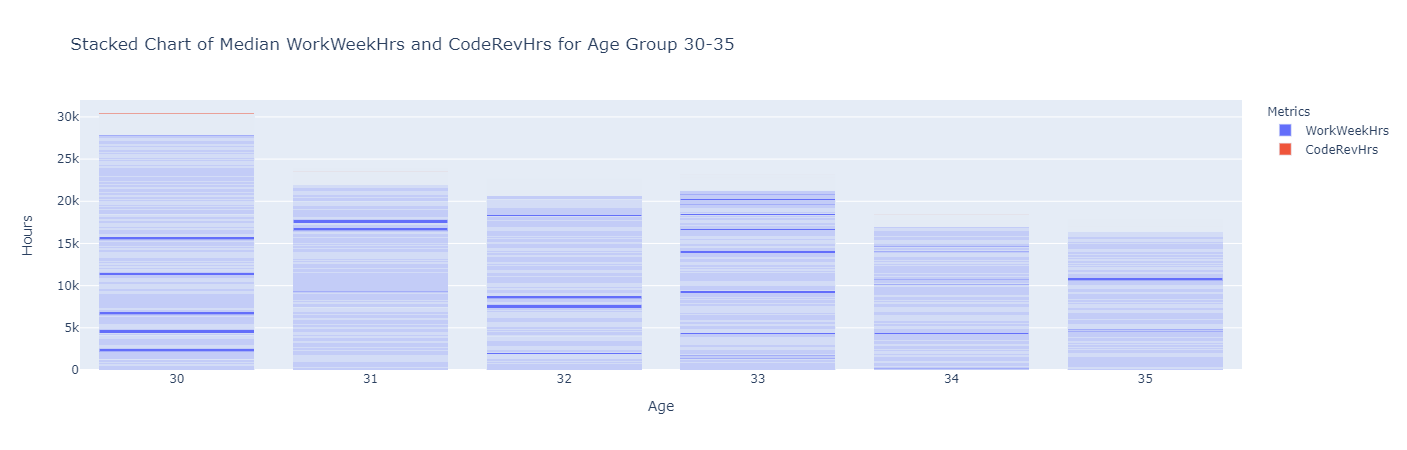

In [82]:
sql_query = "SELECT Age, WorkWeekHrs, CodeRevHrs FROM master"
df = pd.read_sql_query(sql_query, conn)

df_filtered = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Create a stacked chart with Plotly Express
px.bar(df_filtered, x='Age', y=['WorkWeekHrs', 'CodeRevHrs'], title='Stacked Chart of Median WorkWeekHrs and CodeRevHrs for Age Group 30-35',
             labels={'value': 'Hours', 'variable': 'Metrics'}, barmode='stack')


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


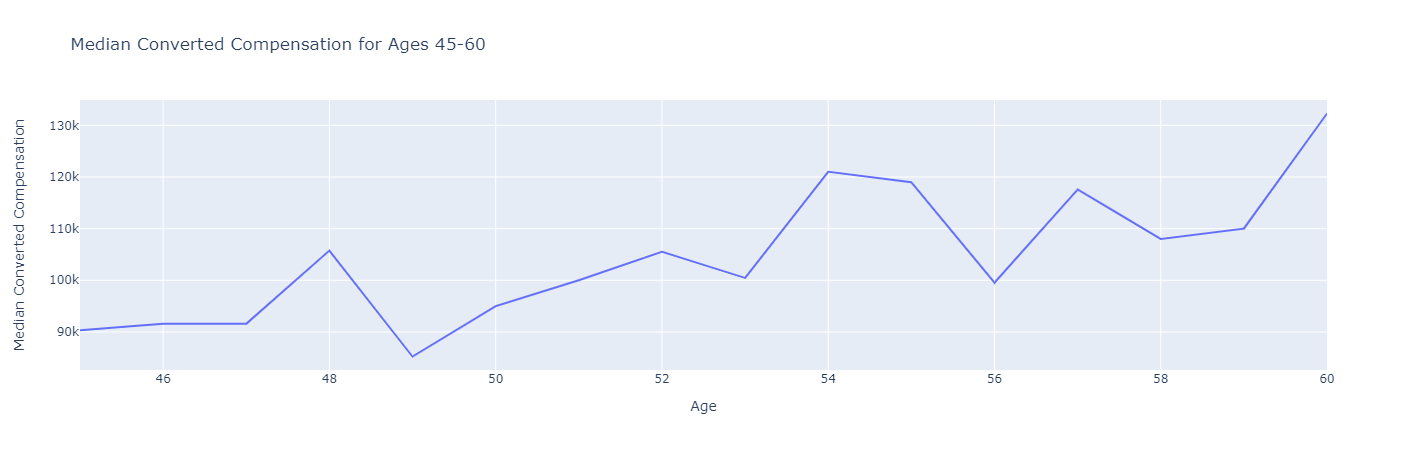

In [84]:
sql_query = "SELECT Age, ConvertedComp FROM master"
df = pd.read_sql_query(sql_query, conn)

df_filtered = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

median_comp_by_age = df_filtered.groupby('Age')['ConvertedComp'].median().reset_index()

# Create a line chart with Plotly Express
fig = px.line(median_comp_by_age, x='Age', y='ConvertedComp', title='Median Converted Compensation for Ages 45-60',
              labels={'ConvertedComp': 'Median Converted Compensation', 'Age': 'Age'})

# Show the plot
fig.show()



### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


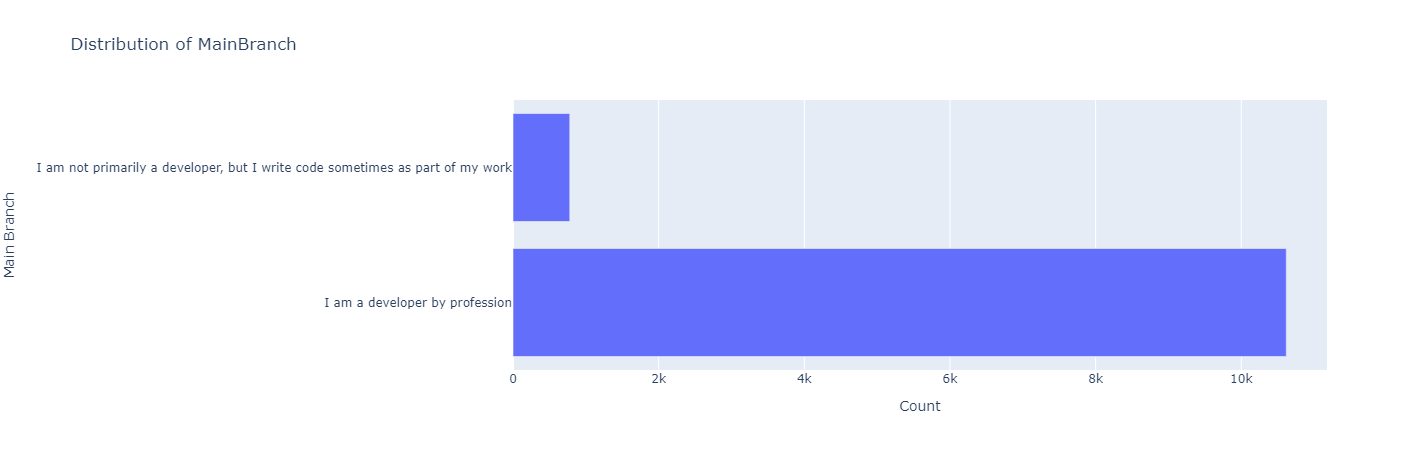

In [85]:
sql_query = "SELECT MainBranch, COUNT(*) as Count FROM master GROUP BY MainBranch"
df = pd.read_sql_query(sql_query, conn)

# Create a horizontal bar chart with Plotly Express
fig = px.bar(df, y='MainBranch', x='Count', orientation='h',
             title='Distribution of MainBranch',
             labels={'MainBranch': 'Main Branch', 'Count': 'Count'})

# Show the plot
fig.show()


Close the database connection.


In [123]:
sql_query = "SELECT *, COUNT(*) as Count FROM LanguageDesireNextYear GROUP BY LanguageDesireNextYear ORDER BY Count DESC, LanguageDesireNextYear"
df=pd.read_sql_query(sql_query,conn)
top_dbs= df.value_counts().reset_index()
python_rank = df[df['LanguageDesireNextYear'] == 'Python'].index[0] + 1
python_rank


3

In [126]:
query = "SELECT COUNT(*) as NumberOfRespondents FROM LanguageWorkedWith WHERE LanguageWorkedWith LIKE '%SQL%';"
result = conn.execute(query).fetchone()

# Extract the number of respondents
number_of_respondents = result[0]

# Print the result
print(f"The number of respondents who currently work with SQL is: {number_of_respondents}")



The number of respondents who currently work with SQL is: 7106


In [166]:
QUERY="SELECT DatabaseWorkedWith,count(Respondent) FROM DatabaseWorkedWith group by Respondent having count(DatabaseWorkedWith)=1 and DatabaseWorkedWith='MySQL'"
df2=pd.read_sql_query(QUERY,conn)
df2.count()

DatabaseWorkedWith    474
count(Respondent)     474
dtype: int64

In [177]:
query = "SELECT DevType FROM DevType"
df=pd.read_sql_query(query, conn)




,DevType
0,"Developer, full-stack"
1,Database administrator
2,"Developer, back-end"
3,"Developer, front-end"
4,"Developer, full-stack"
...,...
35309,"Developer, mobile"
35310,"Engineer, data"
35311,"Engineer, site reliability"
35312,System administrator


In [86]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
